Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.5微米/field0008.sdf
t() = time
bx(2500, 350, 350) = bx
by(2500, 350, 350) = by
bz(2500, 350, 350) = bz
ex(2500, 350, 350) = ex
ey(2500, 350, 350) = ey
ez(2500, 350, 350) = ez
x(2501, 351, 351) = grid
y(2501, 351, 351) = grid
z(2501, 351, 351) = grid
xc(2500, 350, 350) = grid_mid
yc(2500, 350, 350) = grid_mid
zc(2500, 350, 350) = grid_mid
Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-3微米/field0008.sdf
t() = time
bx(2500, 350, 350) = bx
by(2500, 350, 350) = by
bz(2500, 350, 350) = bz
ex(2500, 350, 350) = ex
ey(2500, 350, 350) = ey
ez(2500, 350, 350) = ez
x(2501, 351, 351) = grid
y(2501, 351, 351) = grid
z(2501, 351, 351) = grid
xc(2500, 350, 350) = grid_mid
yc(2500, 350, 350) = grid_mid
zc(2500, 350, 350) = grid_mid


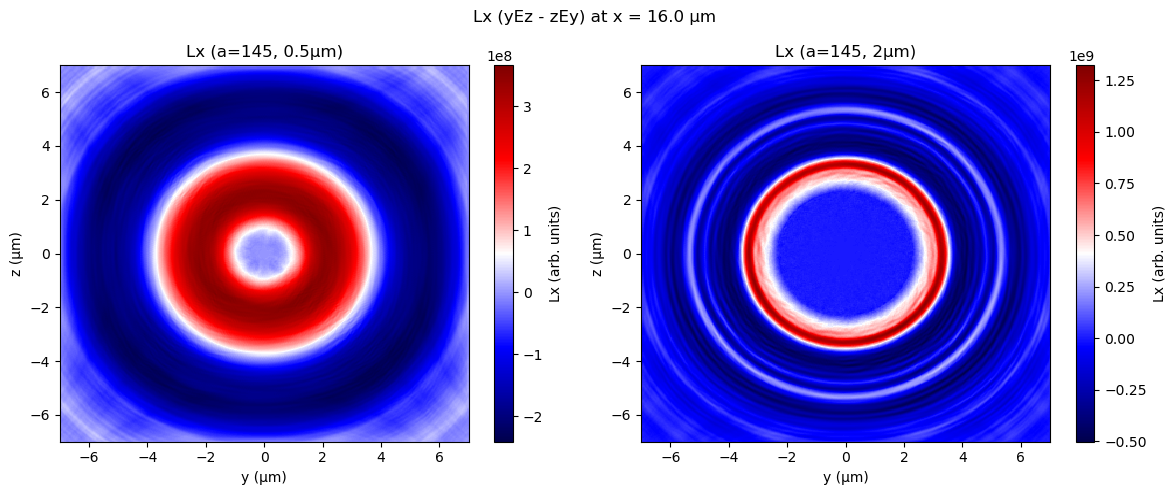

In [62]:
import sys, os
sys.path.append(os.path.abspath('..'))
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
from sdf_utils import *

# === 文件路径设置 ===
base_dir0 = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.5微米'
base_dir1 = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-3微米'
file_name = 'field0008.sdf'

file_path0 = os.path.join(base_dir0, file_name)
file_path1 = os.path.join(base_dir1, file_name)

# === 加载字段数据 ===
result0 = load_field(file_path0)
result1 = load_field(file_path1)

Ey0 = result0['Ey']
Ez0 = result0['Ez']
Ey1 = result1['Ey']
Ez1 = result1['Ez']

x = result0['x']
y = result0['y']
z = result0['z']

# === 取 x=18μm 的截面 ===
target_x = 16e-6
x_index = np.argmin(np.abs(x - target_x))

Ey0_yz = Ey0[x_index, :, :]  # shape: (Ny, Nz)
Ez0_yz = Ez0[x_index, :, :]
Ey1_yz = Ey1[x_index, :, :]
Ez1_yz = Ez1[x_index, :, :]

# === 构造 y-z 网格 ===
Y, Z = np.meshgrid(y, z, indexing='ij')  # shape: (Ny, Nz)

# === 计算角动量 Lx = y*Ez - z*Ey ===
Lx0 = Y * Ez0_yz - Z * Ey0_yz
Lx1 = Y * Ez1_yz - Z * Ey1_yz

# === 绘图 ===
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

pcm0 = axs[0].pcolormesh(Y * 1e6, Z * 1e6, Lx0, shading='auto', cmap='seismic')
fig.colorbar(pcm0, ax=axs[0], label='Lx (arb. units)')
axs[0].set_title('Lx (a=145, 0.5μm)')
axs[0].set_xlabel('y (μm)')
axs[0].set_ylabel('z (μm)')

pcm1 = axs[1].pcolormesh(Y * 1e6, Z * 1e6, Lx1, shading='auto', cmap='seismic')
fig.colorbar(pcm1, ax=axs[1], label='Lx (arb. units)')
axs[1].set_title('Lx (a=145, 2μm)')
axs[1].set_xlabel('y (μm)')
axs[1].set_ylabel('z (μm)')

plt.suptitle(f"Lx (yEz - zEy) at x = {x[x_index]*1e6:.1f} μm")
plt.tight_layout()
plt.show()


Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.5微米/field0010.sdf
t() = time
bx(2500, 350, 350) = bx
by(2500, 350, 350) = by
bz(2500, 350, 350) = bz
ex(2500, 350, 350) = ex
ey(2500, 350, 350) = ey
ez(2500, 350, 350) = ez
x(2501, 351, 351) = grid
y(2501, 351, 351) = grid
z(2501, 351, 351) = grid
xc(2500, 350, 350) = grid_mid
yc(2500, 350, 350) = grid_mid
zc(2500, 350, 350) = grid_mid


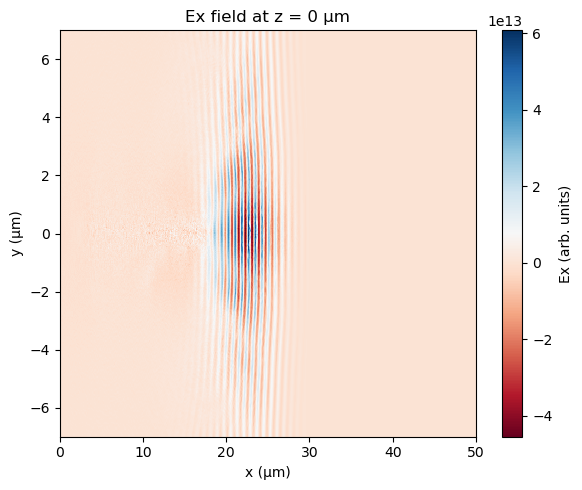

In [72]:
import sys, os
sys.path.append(os.path.abspath('..'))
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
from sdf_utils import *

# === 文件路径设置 ===
base_dir0 = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.5微米'
file_name = 'field0010.sdf'
file_path0 = os.path.join(base_dir0, file_name)

# === 加载字段数据 ===
result = load_field(file_path0)
Ey = result['Ex']
x = result['x']
y = result['y']
z = result['z']

# === 取 z=0 的截面 ===
z_index = np.argmin(np.abs(z - 0.0))
Ey_xy = Ey[:, :, z_index]  # shape: (Nx, Ny)

# === 构造 x-y 网格 ===
X, Y = np.meshgrid(x, y, indexing='ij')  # shape: (Nx, Ny)

# === 绘图 ===
plt.figure(figsize=(6, 5))
pcm = plt.pcolormesh(X * 1e6, Y * 1e6, Ey_xy, shading='auto', cmap='RdBu')  # 注意转置
plt.colorbar(pcm, label='Ex (arb. units)')
plt.xlabel('x (μm)')
plt.ylabel('y (μm)')
plt.title('Ex field at z = 0 μm')
plt.tight_layout()
plt.show()


Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-1.5微米/field0008.sdf
t() = time
bx(2500, 350, 350) = bx
by(2500, 350, 350) = by
bz(2500, 350, 350) = bz
ex(2500, 350, 350) = ex
ey(2500, 350, 350) = ey
ez(2500, 350, 350) = ez
x(2501, 351, 351) = grid
y(2501, 351, 351) = grid
z(2501, 351, 351) = grid
xc(2500, 350, 350) = grid_mid
yc(2500, 350, 350) = grid_mid
zc(2500, 350, 350) = grid_mid


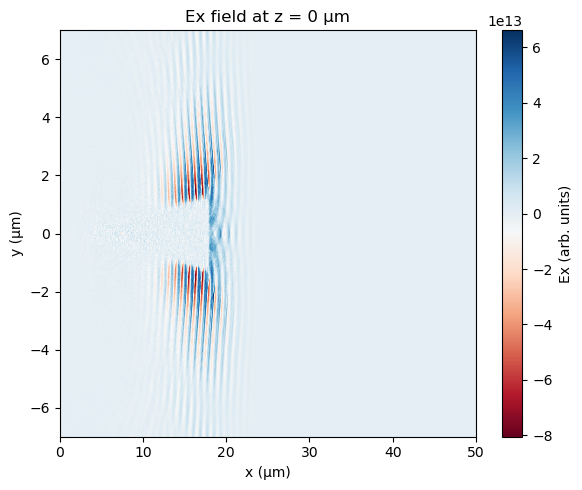

In [66]:
import sys, os
sys.path.append(os.path.abspath('..'))
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
from sdf_utils import *

# === 文件路径设置 ===
base_dir0 = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-1.5微米'
file_name = 'field0008.sdf'
file_path0 = os.path.join(base_dir0, file_name)

# === 加载字段数据 ===
result = load_field(file_path0)
Ey = result['Ex']
x = result['x']
y = result['y']
z = result['z']

# === 取 z=0 的截面 ===
z_index = np.argmin(np.abs(z - 0.0))
Ey_xy = Ey[:, :, z_index]  # shape: (Nx, Ny)

# === 构造 x-y 网格 ===
X, Y = np.meshgrid(x, y, indexing='ij')  # shape: (Nx, Ny)

# === 绘图 ===
plt.figure(figsize=(6, 5))
pcm = plt.pcolormesh(X * 1e6, Y * 1e6, Ey_xy, shading='auto', cmap='RdBu')  # 注意转置
plt.colorbar(pcm, label='Ex (arb. units)')
plt.xlabel('x (μm)')
plt.ylabel('y (μm)')
plt.title('Ex field at z = 0 μm')
plt.tight_layout()
plt.show()


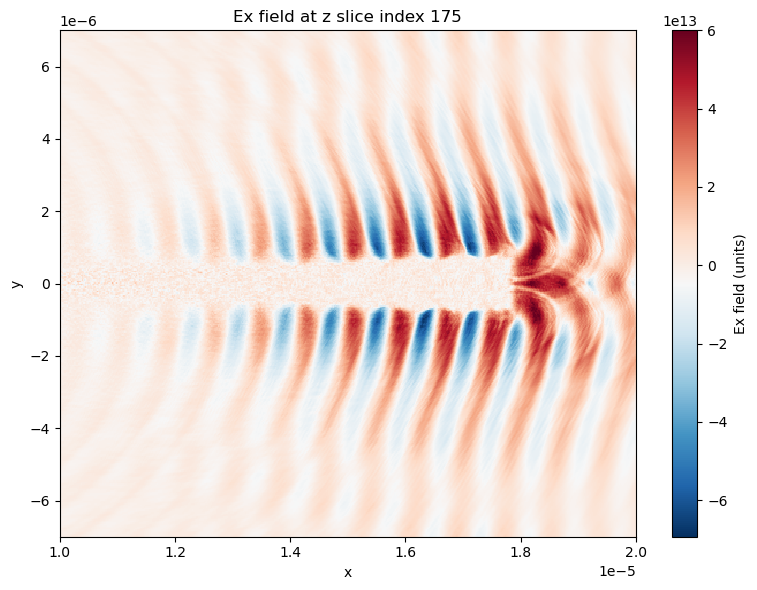

In [43]:
Ex = result['Ex']  # 3D数组，形状可能是 (Nx, Ny, Nz)
x = result['x']    # 1D 或 3D 坐标数组，视具体情况而定
y = result['y']
z = result['z']

# 找到固定z的索引，比如取中间那个z层
z_index = Ex.shape[2] // 2  # 中间切片

# 取出该z层的二维数据 Ex_xy
Ex_xy = Ex[:, :, z_index]

# 如果 x,y 是1D数组，需要生成网格
if x.ndim == 1 and y.ndim == 1:
    X, Y = np.meshgrid(x, y, indexing='ij')
else:
    # 如果x,y是3D数组，取对应切片
    X = x[:, :, z_index]
    Y = y[:, :, z_index]

plt.figure(figsize=(8,6))
pcm = plt.pcolormesh(X, Y, Ex_xy, shading='auto', cmap='RdBu_r',vmax=6e13)
plt.colorbar(pcm, label='Ex field (units)')
plt.xlabel('x')
plt.xlim(1e-5,2e-5)
plt.ylabel('y')
plt.title(f'Ex field at z slice index {z_index}')
plt.tight_layout()
plt.show()